<a href="https://colab.research.google.com/github/pedrogfsilva/PonderadaPoseEstimation/blob/main/Ponderada_Pose_Estimation_Pedro_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# montando o google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1- Análise Exploratória

In [3]:
# importando os pacotes necessários
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [4]:
# obtendo o dataset
dataset_dir = '/content/drive/MyDrive/PonderadaPoseEstimationSemana8/images'

In [5]:
# listando as imagens
file_list = os.listdir(dataset_dir)
image_files = [file for file in file_list if file.endswith('.jpeg')]

In [6]:
# contando a quantidade de cada tipo de animal com base nos nomes dos arquivos
animal_counts = Counter()
for file in image_files:
    if file.startswith('do'):
        animal_counts['Cachorro'] += 1
    elif file.startswith('ca'):
        animal_counts['Gato'] += 1
    elif file.startswith('co'):
        animal_counts['Vaca'] += 1
    elif file.startswith('ho'):
        animal_counts['Cavalo'] += 1
    elif file.startswith('sh'):
        animal_counts['Ovelha'] += 1

# quantidade de bovinos(vacas)
num_bovinos = animal_counts['Vaca']

In [7]:
# criando um dataframe para visualizar os dados
animal_df = pd.DataFrame(list(animal_counts.items()), columns=['Animal', 'Count'])

O gráfico de barras a seguir apresenta a quantidade de imagens por tipo de animal.

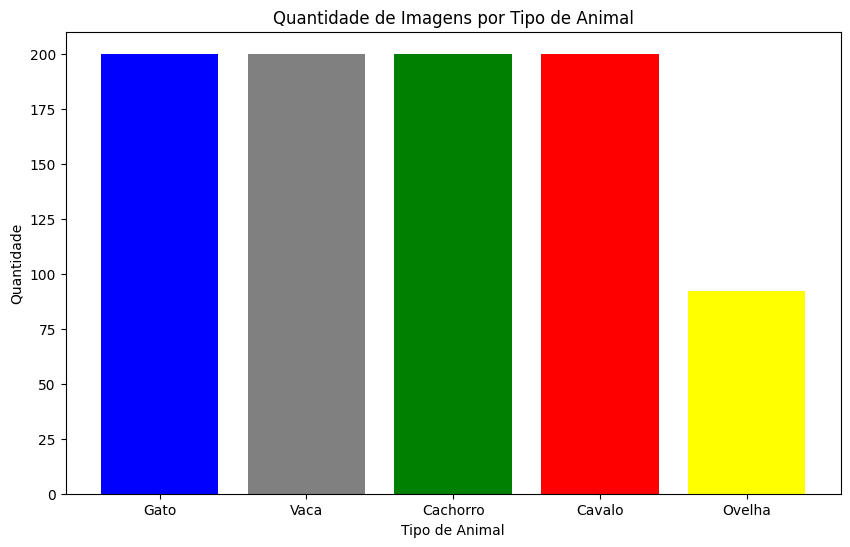

In [14]:
# criando e plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(animal_df['Animal'], animal_df['Count'], color=['blue', 'grey', 'green', 'red', 'yellow'])
plt.xlabel('Tipo de Animal')
plt.ylabel('Quantidade')
plt.title('Quantidade de Imagens por Tipo de Animal')
plt.show()

O gráfico de pizza abaixo apresenta a proporção de imagens por tipo de animal.

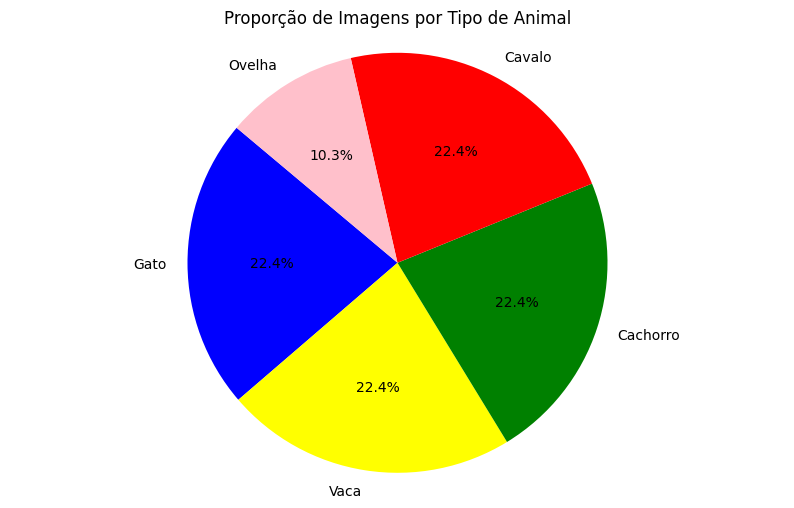

In [17]:
# criando e plotando o gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(animal_df['Count'], labels=animal_df['Animal'], autopct='%1.1f%%', startangle=140, colors=['blue', 'yellow', 'green', 'red', 'pink'])
plt.axis('equal')
plt.title('Proporção de Imagens por Tipo de Animal')
plt.show()

In [20]:
# descrição textual dos resultados
for animal, count in animal_counts.items():
    print(f'Quantidade de {animal}s: {count}')
print(f'\nQuantidade total de bovinos(vacas): {num_bovinos}')

Quantidade de Gatos: 200
Quantidade de Vacas: 200
Quantidade de Cachorros: 200
Quantidade de Cavalos: 200
Quantidade de Ovelhas: 92

Quantidade total de bovinos(vacas): 200


# 2 - Processamento Das Imagens

In [21]:
# importando os pacotes necessários
import cv2

In [22]:
bovino_dir = os.path.join(dataset_dir, 'bovinos')  # diretório para salvar as imagens de bovinos processadas

# verificando se o diretório de bovinos existe
if not os.path.exists(bovino_dir):
    os.makedirs(bovino_dir)

# listando todos os arquivos no diretório
file_list = os.listdir(dataset_dir)

# filtrando os arquivos jpeg das vacas
bovino_files = [file for file in file_list if file.endswith('.jpeg') and file.startswith('co')]

In [23]:
# método para processar uma imagem
def process_image(image_path, output_path):
    # carregando a imagem
    image = cv2.imread(image_path)

    # convertendo a imagem para escala de cinza
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # suavização gaussiana
    smoothed_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # detecção de bordas usando o algoritmo Canny
    edges = cv2.Canny(smoothed_image, 50, 150)

    # salvando a imagem processada
    cv2.imwrite(output_path, edges)

In [24]:
# processando cada imagem de bovino e salvando no diretório
for file in bovino_files:
    input_path = os.path.join(dataset_dir, file)
    output_path = os.path.join(bovino_dir, file)
    process_image(input_path, output_path)

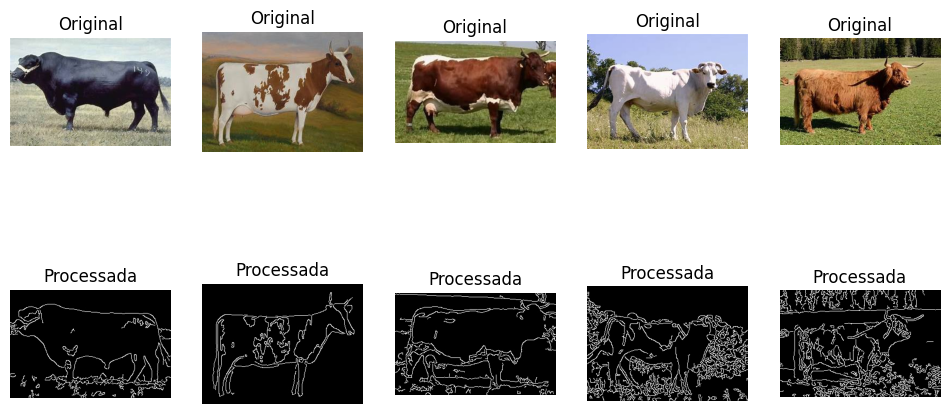

In [25]:
# exibindo algumas imagens originais e processadas para visualização
plt.figure(figsize=(12, 6))

for i, file in enumerate(bovino_files[:5]):
    original_image = cv2.imread(os.path.join(dataset_dir, file))
    processed_image = cv2.imread(os.path.join(bovino_dir, file), cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processada')
    plt.axis('off')

plt.show()

# 3 - Resultados Finais

### Gráfico de Barras

O gráfico de barras mostra a quantidade de imagens por tipo de animal no dataset. As barras de diferentes cores representam cada tipo de animal, permitindo uma comparação fácil da quantidade de imagens entre os diferentes tipos.

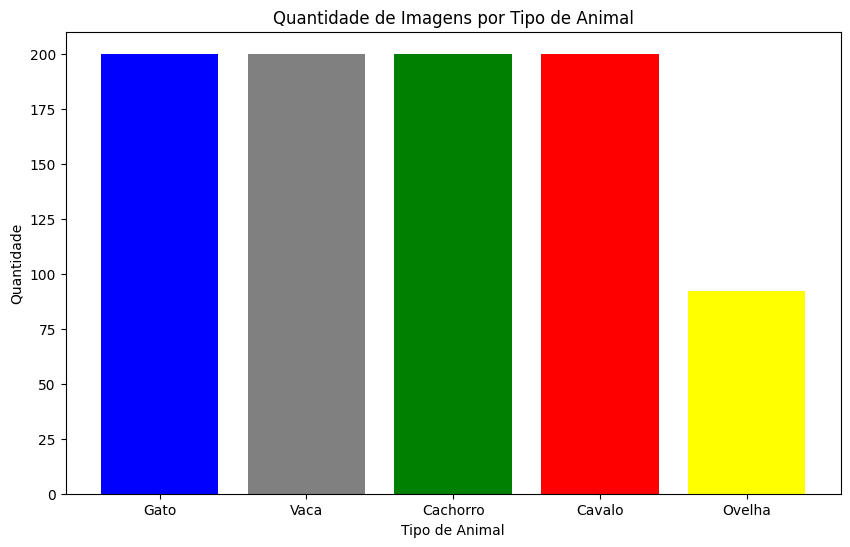

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(animal_df['Animal'], animal_df['Count'], color=['blue', 'grey', 'green', 'red', 'yellow'])
plt.xlabel('Tipo de Animal')
plt.ylabel('Quantidade')
plt.title('Quantidade de Imagens por Tipo de Animal')
plt.show()

### Gráfico de Pizza

O gráfico de pizza representa a proporção de imagens de cada tipo de animal no dataset. As fatias da pizza são coloridas de acordo com o tipo de animal, mostrando visualmente a distribuição das imagens.

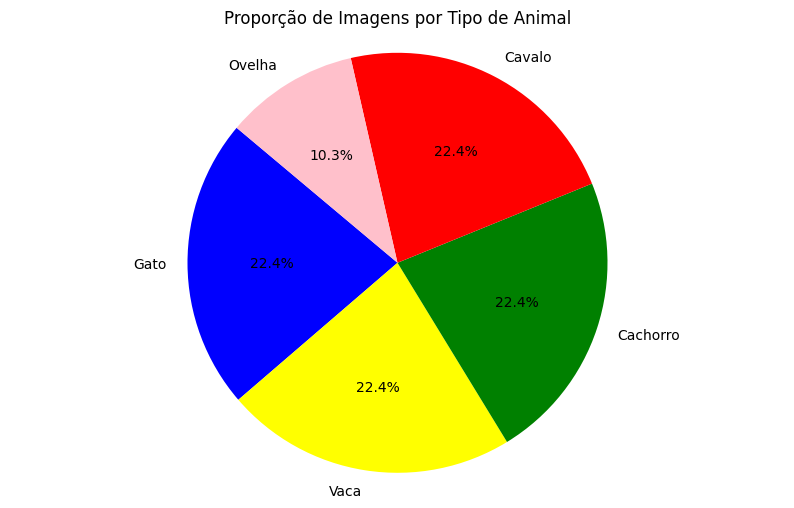

In [27]:
plt.figure(figsize=(10, 6))
plt.pie(animal_df['Count'], labels=animal_df['Animal'], autopct='%1.1f%%', startangle=140, colors=['blue', 'yellow', 'green', 'red', 'pink'])
plt.axis('equal')
plt.title('Proporção de Imagens por Tipo de Animal')
plt.show()

### Tabela de resultados

Tabela de contagem de imagens por tipo de animal

In [31]:
print(animal_df.to_string(index=False))

  Animal  Count
    Gato    200
    Vaca    200
Cachorro    200
  Cavalo    200
  Ovelha     92


### Visualização de Imagens

A visualização das imagens apresenta algumas das imagens originais de bovinos e suas versões processadas lado a lado. A imagem processada é convertida para escala de cinza, suavizada e as bordas são destacadas usando o algoritmo Canny.

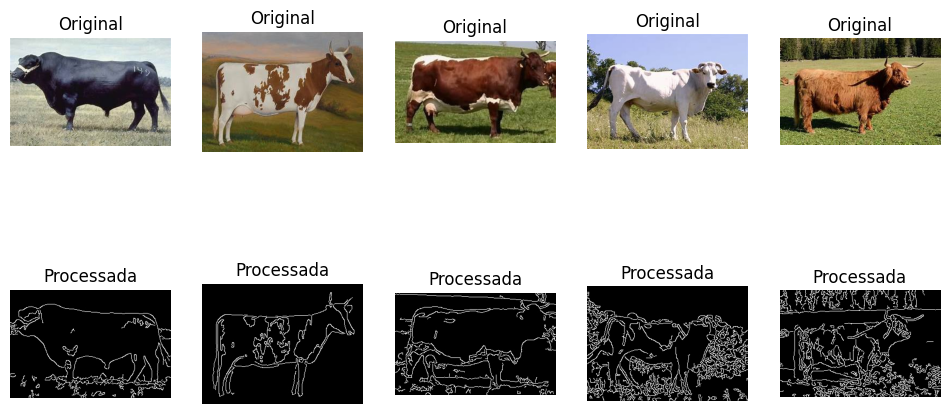

In [32]:
plt.figure(figsize=(12, 6))

for i, file in enumerate(bovino_files[:5]):
    original_image = cv2.imread(os.path.join(dataset_dir, file))
    processed_image = cv2.imread(os.path.join(bovino_dir, file), cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processada')
    plt.axis('off')

plt.show()